In [1]:
import pinocchio as pin
import numpy as np
import hppfcl
from tqdm import trange
import torch
from diffsim.simulator import Simulator, SimulatorNode
from diffsim.shapes import Ellipsoid, Plane
from diffsim.costs import residualTranslation
import crocoddyl as croc
from diffsim.shapes import Ellipsoid, Plane 
from pinocchio.visualize import MeshcatVisualizer
from diffsim.collision_pairs import CollisionPairPlaneEllipsoid
from diffsim.utils_render import init_viewer_ellipsoids
import time
import matplotlib.pyplot as plt

In [2]:
def createCubeModel():
    rmodel = pin.Model()
    freeflyer = pin.JointModelFreeFlyer()
    jointCube = rmodel.addJoint(0, freeflyer, pin.SE3.Identity(), "joint1")
    M = pin.SE3(np.eye(3), np.matrix([0., 0., 0.]).T)
    rmodel.appendBodyToJoint(jointCube, pin.Inertia.FromBox(1,0.2,0.2,0.2), M)
    data = rmodel.createData()
    rgeomModel = pin.GeometryModel()
    a = 0.2
    r = np.array([a/4, a/4, a/4])
    cube_shape = hppfcl.Box(a, a, a)
    rgeomModel.computeColPairDist = []

    n = np.array([0., 0., 1])
    p = np.array([0., 0., 0.0])
    h = np.array([10., 10., 0.])
    plane_shape = Plane(0, 'plane', n, p, h)
    T = pin.SE3(plane_shape.R, plane_shape.t)
    plane = pin.GeometryObject("plane", 0, 0, plane_shape, T)
    plane.meshColor = np.array([0.5, 0.5, 0.5, 1.]) 
    planeId = rgeomModel.addGeometryObject(plane)

    # add balls to cube
    rgeomModel.collision_pairs = []

    R = pin.utils.eye(3)
    t = np.matrix([a/4, -a/4, -a/4]).T
    ball_shape1 = Ellipsoid(jointCube, 'ball1', r,pin.SE3(R, t)) 
    geom_ball1 = pin.GeometryObject("ball1", jointCube, jointCube, ball_shape1, pin.SE3(R, t)) 
    geom_ball1.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball1Id = rgeomModel.addGeometryObject(geom_ball1)
    #col_pair1 = pin.CollisionPair(ball1Id, planeId)
    #rgeomModel.addCollisionPair(col_pair1)
    #rgeomModel.computeColPairDist.append(False)
    col_pair1 = CollisionPairPlaneEllipsoid(planeId, ball1Id)
    col_pair1.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair1]

    R = pin.utils.eye(3)
    t = np.matrix([a/4, a/4, -a/4]).T
    ball_shape2 = Ellipsoid(jointCube, 'ball2', r,pin.SE3(R, t)) 
    geom_ball2 = pin.GeometryObject("ball2", jointCube, jointCube, ball_shape2, pin.SE3(R, t)) 
    geom_ball2.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball2Id = rgeomModel.addGeometryObject(geom_ball2)
    #col_pair2 = pin.CollisionPair(ball2Id, planeId)
    #rgeomModel.addCollisionPair(col_pair2)
    #rgeomModel.computeColPairDist.append(False)
    col_pair2 = CollisionPairPlaneEllipsoid(planeId, ball2Id)
    col_pair2.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair2]

    R = pin.utils.eye(3)
    t = np.matrix([a/4, a/4, a/4]).T
    ball_shape3 = Ellipsoid(jointCube, 'ball3', r,pin.SE3(R, t)) 
    geom_ball3 = pin.GeometryObject("ball3", jointCube, jointCube, ball_shape3, pin.SE3(R, t)) 
    geom_ball3.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball3Id = rgeomModel.addGeometryObject(geom_ball3)
    #col_pair3 = pin.CollisionPair(ball3Id, planeId)
    #rgeomModel.addCollisionPair(col_pair3)
    #rgeomModel.computeColPairDist.append(False)
    col_pair3 = CollisionPairPlaneEllipsoid(planeId, ball3Id)
    col_pair3.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair3]

    R = pin.utils.eye(3)
    t = np.matrix([a/4, -a/4, a/4]).T
    ball_shape4 = Ellipsoid(jointCube, 'ball4', r,pin.SE3(R, t)) 
    geom_ball4 = pin.GeometryObject("ball4", jointCube, jointCube, ball_shape4, pin.SE3(R, t)) 
    geom_ball4.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball4Id = rgeomModel.addGeometryObject(geom_ball4)
    #col_pair4 = pin.CollisionPair(ball4Id, planeId)
    #rgeomModel.addCollisionPair(col_pair4)
    #rgeomModel.computeColPairDist.append(False)
    col_pair4 = CollisionPairPlaneEllipsoid(planeId, ball4Id)
    col_pair4.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair4]

    R = pin.utils.eye(3)
    t = np.matrix([-a/4, -a/4, -a/4]).T
    ball_shape5 = Ellipsoid(jointCube, 'ball5', r,pin.SE3(R, t)) 
    geom_ball5 = pin.GeometryObject("ball5", jointCube, jointCube, ball_shape5, pin.SE3(R, t)) 
    geom_ball5.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball5Id = rgeomModel.addGeometryObject(geom_ball5)
    #col_pair5 = pin.CollisionPair(ball5Id, planeId)
    #rgeomModel.addCollisionPair(col_pair5)
    #rgeomModel.computeColPairDist.append(False)
    col_pair5 = CollisionPairPlaneEllipsoid(planeId, ball5Id)
    col_pair5.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair5]

    R = pin.utils.eye(3)
    t = np.matrix([-a/4, a/4, -a/4]).T
    ball_shape6 = Ellipsoid(jointCube, 'ball6', r,pin.SE3(R, t)) 
    geom_ball6 = pin.GeometryObject("ball6", jointCube, jointCube, ball_shape6, pin.SE3(R, t)) 
    geom_ball6.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball6Id = rgeomModel.addGeometryObject(geom_ball6)
    #col_pair6 = pin.CollisionPair(ball6Id, planeId)
    #rgeomModel.addCollisionPair(col_pair6)
    #rgeomModel.computeColPairDist.append(False)
    col_pair6 = CollisionPairPlaneEllipsoid(planeId, ball6Id)
    col_pair6.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair6]

    R = pin.utils.eye(3)
    t = np.matrix([-a/4, a/4, a/4]).T
    ball_shape7 = Ellipsoid(jointCube, 'ball7', r,pin.SE3(R, t)) 
    geom_ball7 = pin.GeometryObject("ball7", jointCube, jointCube, ball_shape7, pin.SE3(R, t)) 
    geom_ball7.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball7Id = rgeomModel.addGeometryObject(geom_ball7)
    #col_pair7 = pin.CollisionPair(ball7Id, planeId)
    #rgeomModel.addCollisionPair(col_pair7)
    #rgeomModel.computeColPairDist.append(False)
    col_pair7 = CollisionPairPlaneEllipsoid(planeId, ball7Id)
    col_pair7.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair7]

    R = pin.utils.eye(3)
    t = np.matrix([-a/4, -a/4, a/4]).T
    ball_shape8 = Ellipsoid(jointCube, 'ball8', r,pin.SE3(R, t)) 
    geom_ball8 = pin.GeometryObject("ball8", jointCube, jointCube, ball_shape8, pin.SE3(R, t)) 
    geom_ball8.meshColor = np.array([1.0, 0.2, 0.2, 1.]) 
    ball8Id = rgeomModel.addGeometryObject(geom_ball8)
    #col_pair8 = pin.CollisionPair(ball8Id, planeId)
    #rgeomModel.addCollisionPair(col_pair8)
    #rgeomModel.computeColPairDist.append(False)
    col_pair8 = CollisionPairPlaneEllipsoid(planeId, ball8Id)
    col_pair8.computeDistanceResidualBool = True
    rgeomModel.collision_pairs += [col_pair8]

    rgeom_data = rgeomModel.createData()
    return rmodel, rgeomModel, data, rgeom_data, jointCube

In [3]:
rmodel, rgeomModel, data, rgeom_data, _ = createCubeModel()

[  m = 0
   c = 0 0 0
   I = 
 0 0 0
 0 0 0
 0 0 0,
   m = 1
   c = 0 0 0
   I = 
 0.00666667          0          0
          0 0.00666667          0
          0          0 0.00666667]

In [4]:
coeff_friction = 0.15
coeff_rest = 0.0
dt = 5e-3
sim = SimulatorNode(Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))
#state = croc.StateVector(2*rmodel.nv)

In [5]:
theta =  0# np.pi /6
c,s = np.cos(theta), np.sin(theta)
rty = np.array([[c,0.,s],
               [0.,1.,0.],
               [-s,0.,c]])
n = np.array([s,0.,c])
tx, ty =  np.array([c,0.,-s]), np.array([0.,1.,0.])
gpo = pin.SE3(rty,np.matrix([0.,0.,0.]).T)
q_init = pin.SE3ToXYZQUAT(gpo)
q_init[:3] += .1*n
v_init = np.zeros(rmodel.nv)
pin.forwardKinematics(rmodel, data, q_init)
pin.updateGeometryPlacements(rmodel, data, rgeomModel, rgeom_data)

q0 = q_init
dq0 = pin.difference(rmodel, rmodel.qref, q0)
dqrobot0Ref = dq0[:rmodel.nv-6].copy()
v0 = np.zeros(rmodel.nv) 
#v0[rmodel.nv-6:] = np.zeros(6)
x0 = np.zeros(2*rmodel.nv)
x0[:rmodel.nv] = dq0
x0[rmodel.nv:] = v0
dqtarget = torch.tensor(dq0)
dqtarget[2] += .1
dqtarget = dqtarget.detach().numpy()
vtarget = v0.copy()

In [6]:
print(dq0, rmodel.qref)

[0.  0.  0.1 0.  0.  0. ] [0. 0. 0. 0. 0. 0. 1.]


In [7]:
name = "cube_on_floor"
viz = init_viewer_ellipsoids(rmodel, rgeomModel, open=False)
viz.loadViewerModel(name)
viz.display(q0)
viz.viewer.jupyter_cell()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


# Make a cube fly

In [8]:
T = 10

sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))]*T
N_iter = 100
u = (torch.ones(T)*.1).requires_grad_(True)
optimizer = torch.optim.Adam([u], lr = 4.)
positions = []
forces_values = []
loss_values = []

In [9]:
torch.autograd.set_detect_anomaly(False)
for i in trange(N_iter): 
    #sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))]*T
    v, q = torch.tensor(v_init), torch.tensor(q_init)
    xnext = torch.cat((torch.tensor(dq0),torch.tensor(v0)), dim=0).detach().clone()
    positions += [[]]
    forces_values += [[]]
    for t in range(T):
        t_tau = torch.zeros_like(v)
        t_tau[2] = u[t]
        xnext = sim_nodes[t].makeStep(xnext, t_tau, calcPinDiff=True)
        positions[-1] += [xnext[2].detach().item()]
        forces_values[-1] += [u[t].detach().item()]
    loss = .5*torch.square(xnext[2]- dqtarget[2]).sum() + .0005*torch.square(xnext[8]- vtarget[2]).sum()
    loss_values += [loss.detach().item()]
    #forces_values += [sum(u).detach().item()/.001]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[8.87771820e-17 3.10692061e-16 1.21321082e-02]
 [8.87771820e-17 3.10692061e-16 1.21321082e-02]
 [8.87771820e-17 3.10692061e-16 1.21321082e-02]
 [8.87771820e-17 3.10692061e-16 1.21321082e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-2.70800979e-16 -7.17878399e-16  1.21380365e-02]
 [-2.70800979e-16 -7.17878399e-16  1.21380365e-02]
 [-2.70800979e-16 -7.17878399e-16  1.21380365e-02]
 [-2.70800979e-16 -7.17878399e-16  1.21380365e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[5.74545661e-17 6.27372216e-16 1.21379855e-02]
 [5.74545661e-17 6.27372216e-16 1.21379855e-02]
 [5.74545661e-17 6.27372216e-16 1.21379855e-02]
 [5.74545661e-17 6.27372216e-16 1.21379855e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 3.61604769e-16 -6.83155223e-16  1.21379370e-02]
 [ 3.62462909e-16 -6.83155223e-16  1.21379370e-02]
 [ 3.61604769e-16 -6.82737961e-16  1.21379370e-02]
 [ 3.62462909e-16 -6.82737961e-1

  1%|█▎                                                                                                                                  | 1/100 [00:00<00:21,  4.51it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-7.19055324e-16  7.85444790e-17  1.21377580e-02]
 [-7.19055325e-16  7.85444790e-17  1.21377580e-02]
 [-7.19055324e-16  7.85444804e-17  1.21377580e-02]
 [-7.19055325e-16  7.85444804e-17  1.21377580e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[1.16962952e-15 2.57300872e-16 1.21377322e-02]
 [1.16962952e-15 2.57300872e-16 1.21377322e-02]
 [1.16962952e-15 2.57300872e-16 1.21377322e-02]
 [1.16962952e-15 2.57300872e-16 1.21377322e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[1.17920356e-17 1.21401814e-16 1.21321024e-02]
 [1.17920356e-17 1.21401814e-16 1.21321024e-02]
 [1.17920356e-17 1.21401814e-16 1.21321024e-02]
 [1.17920356e-17 1.21401814e-16 1.21321024e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[2.43821125e-16 4.04903250e-17 1.21380306e-02]
 [2.43821125e-16 4.04903250e-17 1.21380306e-02]
 [2.43821125e-16 4.04903250e-17 1.21380306e-02]
 [2.43821125e-16 4.04903250e-17 1.2138030

  2%|██▋                                                                                                                                 | 2/100 [00:00<00:20,  4.72it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 2.72096158e-16 -7.66975978e-16  1.21377460e-02]
 [ 2.72309934e-16 -7.66975978e-16  1.21377460e-02]
 [ 2.72096158e-16 -7.67189754e-16  1.21377460e-02]
 [ 2.72309934e-16 -7.67189754e-16  1.21377460e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-7.18510255e-17  7.08271369e-16  1.21377151e-02]
 [-7.18470675e-17  7.08271369e-16  1.21377151e-02]
 [-7.18510255e-17  7.08267411e-16  1.21377151e-02]
 [-7.18470675e-17  7.08267411e-16  1.21377151e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-1.59473243e-17 -6.17678053e-17  1.21320970e-02]
 [-1.59473243e-17 -6.17678053e-17  1.21320970e-02]
 [-1.59473243e-17 -6.17678053e-17  1.21320970e-02]
 [-1.59473243e-17 -6.17678053e-17  1.21320970e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[9.99941308e-17 1.85826335e-16 1.21380247e-02]
 [9.99941308e-17 1.85826335e-16 1.21380247e-02]
 [9.99941308e-17 1.85826335e-16 1.21380247e-02]
 [9.99941308e-17 

  3%|███▉                                                                                                                                | 3/100 [00:00<00:22,  4.36it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 1.51387276e-16 -3.57130220e-17  1.21320914e-02]
 [ 1.51387276e-16 -3.57130220e-17  1.21320914e-02]
 [ 1.51387276e-16 -3.57130220e-17  1.21320914e-02]
 [ 1.51387276e-16 -3.57130220e-17  1.21320914e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[8.96956127e-17 1.78049345e-16 1.21380183e-02]
 [8.96956127e-17 1.78049345e-16 1.21380183e-02]
 [8.96956127e-17 1.78049345e-16 1.21380183e-02]
 [8.96956127e-17 1.78049345e-16 1.21380183e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-3.44821012e-16  2.37522906e-16  1.21379659e-02]
 [-3.45679153e-16  2.37522906e-16  1.21379659e-02]
 [-3.44821012e-16  2.37105643e-16  1.21379659e-02]
 [-3.45679153e-16  2.37105643e-16  1.21379659e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 4.07626247e-17 -8.44075615e-16  1.21379104e-02]
 [ 4.09789821e-17 -8.44075615e-16  1.21379104e-02]
 [ 4.07626247e-17 -8.44291973e-16  1.21379104e-02]
 [ 4.09789821e-17 -8

  4%|█████▎                                                                                                                              | 4/100 [00:00<00:23,  4.12it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 2.14390437e-16 -2.09898233e-16  1.21320854e-02]
 [ 2.14390437e-16 -2.09898233e-16  1.21320854e-02]
 [ 2.14390437e-16 -2.09898233e-16  1.21320854e-02]
 [ 2.14390437e-16 -2.09898233e-16  1.21320854e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-2.03040858e-16  2.29663887e-16  1.21380116e-02]
 [-2.03040858e-16  2.29663887e-16  1.21380116e-02]
 [-2.03040858e-16  2.29663887e-16  1.21380116e-02]
 [-2.03040858e-16  2.29663887e-16  1.21380116e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[2.20985885e-16 5.21958042e-17 1.21379589e-02]
 [2.20985885e-16 5.21958042e-17 1.21379589e-02]
 [2.20985885e-16 5.21958042e-17 1.21379589e-02]
 [2.20985885e-16 5.21958042e-17 1.21379589e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-3.20517208e-16 -1.82496204e-16  1.21379020e-02]
 [-3.20763742e-16 -1.82862613e-16  1.21379020e-02]
 [-3.20517208e-16 -1.82616079e-16  1.21379020e-02]
 [-3.20397333e-16 -1

  5%|██████▌                                                                                                                             | 5/100 [00:01<00:23,  4.10it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-2.39209864e-17  3.57916356e-16  1.21320790e-02]
 [-2.39209864e-17  3.57916356e-16  1.21320790e-02]
 [-2.39209864e-17  3.57916356e-16  1.21320790e-02]
 [-2.39209864e-17  3.57916356e-16  1.21320790e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-6.41472908e-17 -1.86683946e-16  1.21380051e-02]
 [-6.41472908e-17 -1.86683946e-16  1.21380051e-02]
 [-6.41472908e-17 -1.86683946e-16  1.21380051e-02]
 [-6.41472908e-17 -1.86683946e-16  1.21380051e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-1.40039804e-16 -3.04052121e-16  1.21379515e-02]
 [-1.39793274e-16 -3.05327524e-16  1.21379515e-02]
 [-1.40039804e-16 -3.03932248e-16  1.21379515e-02]
 [-1.39793274e-16 -3.05207651e-16  1.21379515e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[3.24164803e-16 2.80384876e-16 1.21378935e-02]
 [3.23467669e-16 2.80384876e-16 1.21378935e-02]
 [3.22156586e-16 2.80349190e-16 1.21378935e-02]
 [3.23467669e-16 

  7%|█████████▏                                                                                                                          | 7/100 [00:01<00:21,  4.25it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-9.99515396e-18  2.92105567e-16  1.21320726e-02]
 [-9.99515396e-18  2.92105567e-16  1.21320726e-02]
 [-9.99515396e-18  2.92105567e-16  1.21320726e-02]
 [-9.99515396e-18  2.92105567e-16  1.21320726e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-2.94893189e-16 -4.41990452e-16  1.21379987e-02]
 [-2.94893189e-16 -4.41990452e-16  1.21379987e-02]
 [-2.94893189e-16 -4.41990452e-16  1.21379987e-02]
 [-2.94893189e-16 -4.41990452e-16  1.21379987e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[1.04848232e-15 4.95728214e-16 1.21379460e-02]
 [1.04710908e-15 4.95728214e-16 1.21379460e-02]
 [1.04848232e-15 4.95459646e-16 1.21379460e-02]
 [1.04875089e-15 4.95459646e-16 1.21379460e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-1.41234895e-15 -2.16874510e-16  1.21378860e-02]
 [-1.41220970e-15 -2.16874510e-16  1.21378860e-02]
 [-1.41234895e-15 -2.17013767e-16  1.21378860e-02]
 [-1.41220970e-15 -2

  8%|██████████▌                                                                                                                         | 8/100 [00:01<00:20,  4.47it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[6.71584502e-17 1.44873580e-16 1.21320662e-02]
 [6.71584502e-17 1.44873580e-16 1.21320662e-02]
 [6.71584502e-17 1.44873580e-16 1.21320662e-02]
 [6.71584502e-17 1.44873580e-16 1.21320662e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 1.64261255e-17 -2.80598411e-16  1.21379922e-02]
 [ 1.64261255e-17 -2.80598411e-16  1.21379922e-02]
 [ 1.64261255e-17 -2.80598411e-16  1.21379922e-02]
 [ 1.64261255e-17 -2.80598411e-16  1.21379922e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[3.91727173e-16 8.12776007e-17 1.21379399e-02]
 [3.91727173e-16 8.12776007e-17 1.21379399e-02]
 [3.91727173e-16 8.12776007e-17 1.21379399e-02]
 [3.91727173e-16 8.12776007e-17 1.21379399e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-8.70751167e-16  9.37482102e-17  1.21378786e-02]
 [-8.70751167e-16  9.37482102e-17  1.21378786e-02]
 [-8.70751167e-16  9.37482102e-17  1.21378786e-02]
 [-8.70751167e-16  9.37482102e-1

  9%|███████████▉                                                                                                                        | 9/100 [00:02<00:19,  4.63it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[5.23286216e-16 8.64439410e-16 1.21379859e-02]
 [5.23286216e-16 8.64439410e-16 1.21379859e-02]
 [5.23286216e-16 8.64439410e-16 1.21379859e-02]
 [5.23286216e-16 8.64439410e-16 1.21379859e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-5.06028112e-16 -1.03223301e-15  1.21379337e-02]
 [-5.06028112e-16 -1.03223301e-15  1.21379337e-02]
 [-5.06028112e-16 -1.03223301e-15  1.21379337e-02]
 [-5.06028112e-16 -1.03223301e-15  1.21379337e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-1.35940357e-16  3.64937268e-16  1.21378718e-02]
 [-1.34200706e-16  3.65303680e-16  1.21378718e-02]
 [-1.33932138e-16  3.65572248e-16  1.21378718e-02]
 [-1.34200706e-16  3.65572248e-16  1.21378718e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-9.68872907e-17 -4.34880869e-16  1.21378295e-02]
 [-9.70265474e-17 -4.34880869e-16  1.21378295e-02]
 [-9.68872907e-17 -4.34741612e-16  1.21378295e-02]
 [-9.70265474e-17 -4

 10%|█████████████                                                                                                                      | 10/100 [00:02<00:18,  4.75it/s]

torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[2.75360719e-16 5.60537238e-16 1.21379275e-02]
 [2.76158920e-16 5.60537238e-16 1.21379275e-02]
 [2.74994313e-16 5.61014437e-16 1.21379275e-02]
 [2.76158920e-16 5.61014437e-16 1.21379275e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-1.98818768e-16  1.21712479e-16  1.21378656e-02]
 [-1.99066203e-16  1.21712479e-16  1.21378656e-02]
 [-1.98818768e-16  1.21959914e-16  1.21378656e-02]
 [-1.99066203e-16  1.21959914e-16  1.21378656e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[ 1.32951216e-16 -7.44568113e-16  1.21378231e-02]
 [ 1.32946635e-16 -7.44568113e-16  1.21378231e-02]
 [ 1.32951216e-16 -7.44563532e-16  1.21378231e-02]
 [ 1.32946635e-16 -7.44563532e-16  1.21378231e-02]]
torch.Size([4, 3])
wherer (array([0, 1, 4, 5]),)
data.l [[-2.32023805e-16  9.59196446e-16  1.21377679e-02]
 [-2.32023890e-16  9.59196446e-16  1.21377679e-02]
 [-2.32023805e-16  9.59196531e-16  1.21377679e-02]
 [-2.32023890e-16  9

 10%|█████████████                                                                                                                      | 10/100 [00:02<00:20,  4.37it/s]


KeyboardInterrupt: 

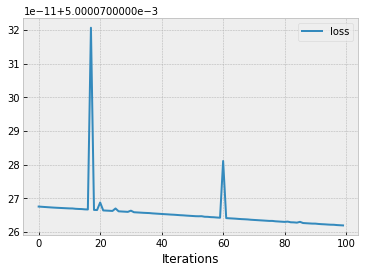

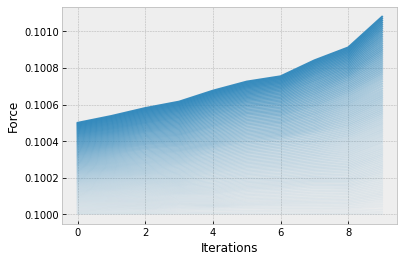

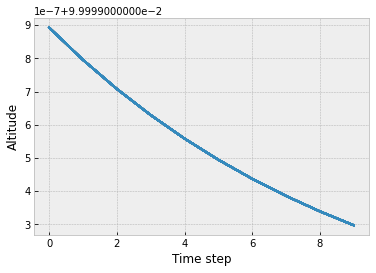

In [14]:
plt.style.use('bmh')
plt.figure()
plt.plot([i for i in range(N_iter)], loss_values, label="loss")
plt.xlabel("Iterations")
plt.ylabel("")
plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    plt.plot([i for i in range(T)], forces_values[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Iterations")
plt.ylabel("Force")
#plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    #plt.plot([i for i in range(N_iter)], forces_values[j], label= "u", alpha = .9**(N_iter-j))
    plt.plot([i for i in range(T)], positions[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Time step")
plt.ylabel("Altitude")
#plt.legend()
plt.show()

### Using randomized smoothing

In [20]:
T = 10
sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))]*T
N_iter = 200
u = (torch.ones(T)*.1).requires_grad_(True)
optimizer = torch.optim.Adam([u], lr = 4.)
positions = []
forces_values = []
loss_values = []

In [21]:
torch.autograd.set_detect_anomaly(False)
N_samples, noise_intensity = 4, 20e-0
for i in trange(N_iter): 
    #sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))]*T
    v, q = torch.tensor(v_init), torch.tensor(q_init)
    xnext = torch.cat((torch.tensor(dq0),torch.tensor(v0)), dim=0).detach().clone()
    positions += [[]]
    forces_values += [[]]
    for t in range(T):
        u_noise = torch.normal(torch.zeros(T,N_samples))
        xnext_int = torch.zeros_like(xnext)
        for N in range(N_samples):
            t_tau = torch.zeros_like(v)
            t_tau[2] = u[t] +  noise_intensity* u_noise[t,N]
            xnext_sample = sim_nodes[t].makeStep(xnext, t_tau, calcPinDiff=True)
            xnext_int += xnext_sample
        xnext = xnext_int/N_samples
        positions[-1] += [xnext[2].detach().item()]
        forces_values[-1] += [u[t].detach().item()]
    loss = .5*torch.square(xnext[2]- dqtarget[2]).sum() + .0005*torch.square(xnext[8]- vtarget[2]).sum()
    loss_values += [loss.detach().item()]
    #forces_values += [sum(u).detach().item()/.001]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:27<00:00,  7.15it/s]


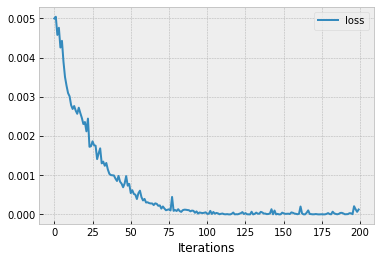

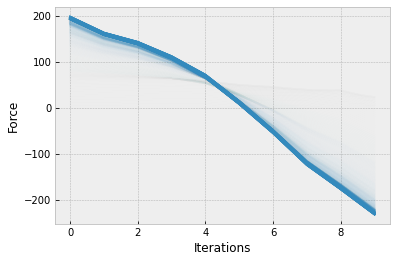

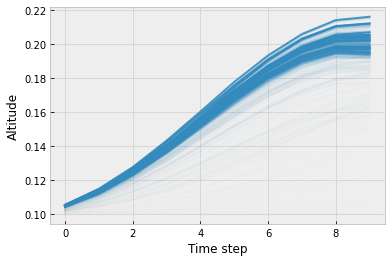

In [22]:
plt.figure()
plt.plot([i for i in range(N_iter)], loss_values, label="loss")
plt.xlabel("Iterations")
plt.ylabel("")
plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    plt.plot([i for i in range(T)], forces_values[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Iterations")
plt.ylabel("Force")
#plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    #plt.plot([i for i in range(N_iter)], forces_values[j], label= "u", alpha = .9**(N_iter-j))
    plt.plot([i for i in range(T)], positions[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Time step")
plt.ylabel("Altitude")
#plt.legend()
plt.show()

# Make a cube slide

In [51]:
T = 10

sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt, steps_contact_cascade=15))]*T
dqtarget = torch.tensor(dq0)
dqtarget[0] += .1
dqtarget = dqtarget.detach().numpy()
vtarget = v0.copy()
u = (torch.ones(T)*.0).requires_grad_(True)
optimizer = torch.optim.Adam([u], lr = .1)
positions = []
forces_values = []
loss_values = []

In [52]:
torch.autograd.set_detect_anomaly(False)
N_iter = 100
N_samples, noise_intensity = 4, 4e-0
for i in trange(N_iter): 
    #sim_nodes = [SimulatorNode( Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt))]*T
    v, q = torch.tensor(v_init), torch.tensor(q_init)
    xnext = torch.cat((torch.tensor(dq0),torch.tensor(v0)), dim=0).detach().clone()
    positions += [[]]
    forces_values += [[]]
    for t in range(T):
        u_noise = torch.normal(torch.zeros(T,N_samples))
        xnext_int = torch.zeros_like(xnext)
        for N in range(N_samples):
            t_tau = torch.zeros_like(v)
            t_tau[0] = u[t] +  noise_intensity* u_noise[t,N]
            xnext_sample = sim_nodes[t].makeStep(xnext, t_tau, calcPinDiff=True)
            xnext_int += xnext_sample
        xnext = xnext_int/N_samples
        positions[-1] += [xnext[0].detach().item()]
        forces_values[-1] += [u[t].detach().item()]
    loss = .5*torch.square(xnext[0]- dqtarget[0]).sum() + .0005*torch.square(xnext[6]- vtarget[0]).sum()
    loss_values += [loss.detach().item()]
    #forces_values += [sum(u).detach().item()/.001]
    optimizer.zero_grad()
    loss.backward()
    #print("x", xnext)
    #print("u", u)
    print(u.grad)
    optimizer.step()

  1%|█▎                                                                                                                                  | 1/100 [00:01<01:48,  1.10s/it]

tensor([-6.6468e-07, -1.2609e-06, -1.9085e-06, -1.0526e-06, -9.1464e-07,
        -2.1292e-06, -3.8155e-06, -4.4011e-06, -3.1512e-06, -1.8731e-06])


  2%|██▋                                                                                                                                 | 2/100 [00:02<01:46,  1.09s/it]

tensor([-1.6413e-06, -1.8067e-06, -1.0086e-06, -5.9836e-07, -1.1412e-06,
        -1.9132e-06, -1.7140e-06, -2.1617e-06, -9.6223e-07, -1.2027e-06])


  3%|███▉                                                                                                                                | 3/100 [00:03<01:45,  1.09s/it]

tensor([-7.9694e-07, -2.1759e-06, -2.3306e-06, -9.9645e-07, -2.5259e-06,
        -1.3774e-06, -1.3266e-07, -2.0739e-06, -1.5867e-06, -1.2792e-06])


  4%|█████▎                                                                                                                              | 4/100 [00:04<01:46,  1.11s/it]

tensor([-9.0730e-07, -9.6354e-07, -5.0205e-07, -2.1579e-06, -1.3194e-06,
        -2.5055e-06, -1.6511e-06, -1.2747e-06, -1.3956e-06, -1.5771e-06])


  5%|██████▌                                                                                                                             | 5/100 [00:05<01:44,  1.09s/it]

tensor([-1.8694e-06, -1.9880e-06, -1.6867e-06, -1.0892e-06, -1.4063e-06,
        -2.0795e-06, -1.6580e-06, -3.0946e-06, -2.0135e-06, -1.1012e-06])


  6%|███████▉                                                                                                                            | 6/100 [00:06<01:41,  1.08s/it]

tensor([-1.9737e-06, -2.0097e-06, -5.3992e-07, -1.3478e-06, -5.7866e-07,
        -1.1780e-06, -1.4196e-06, -1.0741e-09, -1.1673e-06, -7.0128e-07])


  7%|█████████▏                                                                                                                          | 7/100 [00:07<01:39,  1.07s/it]

tensor([-2.8560e-06, -2.1852e-06, -1.1583e-06, -3.3371e-06, -5.9821e-06,
        -5.0660e-06, -3.7091e-06, -3.7410e-06, -2.7423e-06, -1.4257e-06])


  8%|██████████▌                                                                                                                         | 8/100 [00:08<01:36,  1.05s/it]

tensor([-9.2668e-07, -1.3114e-06, -7.6937e-07, -3.2459e-06, -2.8395e-06,
        -2.4390e-06, -1.6892e-06, -1.4315e-06, -1.0585e-06, -5.8841e-07])


  9%|███████████▉                                                                                                                        | 9/100 [00:09<01:35,  1.05s/it]

tensor([-1.2620e-06, -9.9865e-07, -2.0074e-06, -1.8873e-06, -2.4483e-06,
        -2.7066e-06, -1.8076e-06, -8.8001e-07, -9.8088e-07, -1.5173e-06])


 10%|█████████████                                                                                                                      | 10/100 [00:10<01:36,  1.07s/it]

tensor([-3.4551e-07, -3.3226e-06, -2.0616e-06, -2.1828e-06, -2.8700e-06,
        -3.2433e-06, -2.6236e-06, -1.9302e-06, -1.7945e-06, -1.2856e-06])


 11%|██████████████▍                                                                                                                    | 11/100 [00:11<01:34,  1.06s/it]

tensor([-1.0023e-06, -1.5441e-06, -1.9812e-06, -2.7819e-06, -2.1460e-06,
        -1.8960e-06, -6.4394e-07, -1.0390e-06, -1.4404e-06, -1.2482e-06])


 12%|███████████████▋                                                                                                                   | 12/100 [00:12<01:34,  1.07s/it]

tensor([-2.6931e-06, -1.9027e-06, -3.4839e-06, -4.3766e-06, -4.1135e-06,
        -3.3920e-06, -2.9291e-06, -2.2822e-06, -2.3506e-06, -1.3125e-06])


 13%|█████████████████                                                                                                                  | 13/100 [00:13<01:32,  1.06s/it]

tensor([-4.7765e-06, -6.1177e-06, -6.5303e-06, -7.9461e-06, -7.3593e-06,
        -6.2837e-06, -4.9812e-06, -3.2493e-06, -1.6664e-06, -1.1357e-06])


 14%|██████████████████▎                                                                                                                | 14/100 [00:15<01:37,  1.13s/it]

tensor([-1.8910e-06, -2.2917e-06, -1.7345e-06, -1.6237e-06, -2.6340e-06,
        -1.2480e-06, -1.8558e-06, -9.9638e-07, -1.4978e-06, -1.8075e-06])


 15%|███████████████████▋                                                                                                               | 15/100 [00:16<01:33,  1.10s/it]

tensor([-1.3007e-06, -8.1842e-07, -1.3269e-06, -1.5814e-09, -2.5190e-06,
        -2.2748e-06, -1.6520e-06, -6.3303e-07, -8.3021e-07, -8.5717e-07])


 16%|████████████████████▉                                                                                                              | 16/100 [00:17<01:30,  1.08s/it]

tensor([-2.2203e-06, -3.2675e-06, -3.2359e-06, -1.8728e-06, -2.1637e-06,
        -6.4035e-06, -6.1491e-06, -5.2765e-06, -3.7760e-06, -1.9046e-06])


 17%|██████████████████████▎                                                                                                            | 17/100 [00:18<01:28,  1.07s/it]

tensor([-3.1126e-06, -1.5908e-06, -1.3642e-06, -1.5223e-06, -2.7463e-06,
        -1.4385e-06, -2.1882e-06, -3.1772e-06, -2.1619e-06, -1.2898e-06])


 18%|███████████████████████▌                                                                                                           | 18/100 [00:19<01:26,  1.05s/it]

tensor([-6.0508e-07, -8.4619e-07, -1.9070e-06, -1.4051e-06, -2.3690e-06,
        -2.3748e-06, -2.6085e-06, -1.9819e-06, -1.7838e-06, -1.0595e-06])


 19%|████████████████████████▉                                                                                                          | 19/100 [00:20<01:24,  1.04s/it]

tensor([-1.1426e-06, -1.9420e-06, -9.5823e-07, -1.6697e-06, -1.2933e-06,
        -1.2150e-06, -2.2875e-06, -1.2171e-06, -8.8630e-07, -7.5502e-07])


 20%|██████████████████████████▏                                                                                                        | 20/100 [00:21<01:23,  1.04s/it]

tensor([-9.0976e-07, -7.8366e-07, -2.1330e-06, -2.8185e-06, -2.4178e-06,
        -3.5828e-06, -5.2676e-06, -4.5030e-06, -2.9899e-06, -1.7800e-06])


 21%|███████████████████████████▌                                                                                                       | 21/100 [00:22<01:23,  1.06s/it]

tensor([-3.0929e-06, -4.3401e-06, -4.1757e-06, -2.7180e-06, -2.4520e-06,
        -1.8151e-06, -2.3207e-06, -2.6296e-06, -2.8141e-06, -1.8773e-06])


 22%|████████████████████████████▊                                                                                                      | 22/100 [00:23<01:22,  1.06s/it]

tensor([-1.5357e-06, -9.1361e-07, -8.8135e-07, -1.2119e-06, -2.9317e-06,
        -2.9680e-06, -4.0047e-06, -4.0097e-06, -2.9028e-06, -1.8631e-06])


 23%|██████████████████████████████▏                                                                                                    | 23/100 [00:24<01:20,  1.05s/it]

tensor([-1.9169e-06, -1.4238e-06, -2.9305e-06, -5.7488e-06, -7.3205e-06,
        -6.5458e-06, -5.0533e-06, -5.1306e-06, -3.6864e-06, -1.8471e-06])


 24%|███████████████████████████████▍                                                                                                   | 24/100 [00:25<01:19,  1.05s/it]

tensor([-3.3711e-06, -3.0389e-06, -2.5794e-06, -3.3443e-06, -8.0058e-06,
        -8.2394e-06, -7.0295e-06, -5.5902e-06, -3.8178e-06, -1.8724e-06])


 25%|████████████████████████████████▊                                                                                                  | 25/100 [00:26<01:20,  1.07s/it]

tensor([-2.7896e-06, -2.8337e-06, -2.6120e-06, -3.2058e-06, -3.0794e-06,
        -4.6220e-06, -3.7118e-06, -3.6661e-06, -2.6806e-06, -1.8121e-06])


 26%|██████████████████████████████████                                                                                                 | 26/100 [00:27<01:18,  1.07s/it]

tensor([-4.3848e-06, -5.0936e-06, -4.5528e-06, -5.3510e-06, -6.3690e-06,
        -5.9726e-06, -5.0923e-06, -5.3504e-06, -3.7653e-06, -1.8596e-06])


 27%|███████████████████████████████████▎                                                                                               | 27/100 [00:28<01:17,  1.06s/it]

tensor([-3.2400e-06, -2.9701e-06, -3.3336e-06, -4.6318e-06, -3.9011e-06,
        -4.3242e-06, -3.2842e-06, -2.8923e-06, -2.6821e-06, -1.3227e-06])


 28%|████████████████████████████████████▋                                                                                              | 28/100 [00:29<01:16,  1.06s/it]

tensor([-9.3329e-06, -9.5349e-06, -8.8515e-06, -8.0490e-06, -7.6406e-06,
        -7.2426e-06, -6.1531e-06, -4.9141e-06, -3.7748e-06, -1.8852e-06])


 29%|█████████████████████████████████████▉                                                                                             | 29/100 [00:31<01:16,  1.08s/it]

tensor([-1.2901e-06, -1.8349e-06, -6.6182e-06, -8.7724e-06, -8.9737e-06,
        -8.1213e-06, -7.4983e-06, -5.8489e-06, -3.8900e-06, -1.7593e-06])


 30%|███████████████████████████████████████▎                                                                                           | 30/100 [00:32<01:14,  1.07s/it]

tensor([-3.6038e-06, -7.4740e-06, -1.0027e-05, -9.5730e-06, -9.3749e-06,
        -8.3078e-06, -7.4130e-06, -5.7369e-06, -3.8858e-06, -1.8067e-06])


 31%|████████████████████████████████████████▌                                                                                          | 31/100 [00:33<01:13,  1.07s/it]

tensor([-2.1460e-06, -2.0511e-06, -3.3354e-06, -5.3603e-06, -7.3193e-06,
        -6.6114e-06, -5.9768e-06, -5.3216e-06, -3.8558e-06, -1.8599e-06])


 32%|█████████████████████████████████████████▉                                                                                         | 32/100 [00:34<01:12,  1.07s/it]

tensor([-1.3626e-06, -2.7571e-06, -2.4132e-06, -1.4954e-06, -3.0329e-06,
        -5.4135e-06, -5.0887e-06, -4.3078e-06, -3.3279e-06, -1.7386e-06])


 33%|███████████████████████████████████████████▏                                                                                       | 33/100 [00:35<01:11,  1.07s/it]

tensor([-2.7480e-06, -3.3226e-06, -7.3636e-06, -1.0661e-05, -9.9896e-06,
        -9.0299e-06, -7.6137e-06, -5.8400e-06, -3.9099e-06, -1.7973e-06])


 34%|████████████████████████████████████████████▌                                                                                      | 34/100 [00:36<01:13,  1.11s/it]

tensor([-2.7501e-06, -9.2837e-06, -1.2225e-05, -1.1821e-05, -1.0646e-05,
        -9.2101e-06, -7.5253e-06, -5.7568e-06, -3.8053e-06, -1.6799e-06])


 35%|█████████████████████████████████████████████▊                                                                                     | 35/100 [00:37<01:11,  1.10s/it]

tensor([-4.3364e-06, -6.0490e-06, -7.8672e-06, -8.0905e-06, -9.9278e-06,
        -9.0325e-06, -7.6104e-06, -5.8470e-06, -3.8688e-06, -1.6958e-06])


 36%|███████████████████████████████████████████████▏                                                                                   | 36/100 [00:38<01:10,  1.10s/it]

tensor([-4.3989e-06, -8.0982e-06, -9.4235e-06, -9.1051e-06, -8.5875e-06,
        -7.9919e-06, -7.2424e-06, -5.7944e-06, -3.9183e-06, -1.7827e-06])


 37%|████████████████████████████████████████████████▍                                                                                  | 37/100 [00:39<01:08,  1.09s/it]

tensor([-4.6115e-06, -5.1368e-06, -4.9838e-06, -5.2304e-06, -7.5931e-06,
        -7.6063e-06, -6.8243e-06, -5.7948e-06, -3.9307e-06, -1.8516e-06])


 38%|█████████████████████████████████████████████████▊                                                                                 | 38/100 [00:40<01:06,  1.08s/it]

tensor([-4.3196e-06, -8.4682e-06, -1.1134e-05, -1.1053e-05, -1.0728e-05,
        -9.3679e-06, -7.6570e-06, -5.7405e-06, -3.6371e-06, -1.4069e-06])


 39%|███████████████████████████████████████████████████                                                                                | 39/100 [00:41<01:06,  1.09s/it]

tensor([-1.4541e-06, -6.4527e-06, -1.1561e-05, -1.1478e-05, -1.0374e-05,
        -9.0318e-06, -7.5042e-06, -5.7667e-06, -3.7433e-06, -1.5551e-06])


 40%|████████████████████████████████████████████████████▍                                                                              | 40/100 [00:43<01:07,  1.13s/it]

tensor([-8.6375e-06, -1.0363e-05, -1.1229e-05, -1.0696e-05, -1.0128e-05,
        -9.1104e-06, -7.5664e-06, -5.7480e-06, -3.7783e-06, -1.5891e-06])


 41%|█████████████████████████████████████████████████████▋                                                                             | 41/100 [00:44<01:05,  1.11s/it]

tensor([-4.6849e-06, -8.5169e-06, -8.9930e-06, -1.1630e-05, -1.0509e-05,
        -9.0713e-06, -7.4899e-06, -5.7395e-06, -3.8137e-06, -1.6667e-06])


 42%|███████████████████████████████████████████████████████                                                                            | 42/100 [00:45<01:06,  1.15s/it]

tensor([-6.6437e-06, -7.1495e-06, -7.7376e-06, -9.0299e-06, -8.4921e-06,
        -8.6254e-06, -7.2191e-06, -5.6645e-06, -3.8825e-06, -1.8037e-06])


 43%|████████████████████████████████████████████████████████▎                                                                          | 43/100 [00:46<01:04,  1.12s/it]

tensor([-8.4613e-06, -8.8739e-06, -1.0773e-05, -1.0964e-05, -1.0107e-05,
        -9.0868e-06, -7.5721e-06, -5.7522e-06, -3.7673e-06, -1.5746e-06])


 44%|█████████████████████████████████████████████████████████▋                                                                         | 44/100 [00:47<01:01,  1.11s/it]

tensor([-8.1866e-06, -1.1090e-05, -1.1682e-05, -1.1625e-05, -1.0524e-05,
        -9.2051e-06, -7.6244e-06, -5.7823e-06, -3.7694e-06, -1.6000e-06])


 45%|██████████████████████████████████████████████████████████▉                                                                        | 45/100 [00:48<01:00,  1.09s/it]

tensor([-1.3972e-05, -1.4265e-05, -1.3704e-05, -1.2394e-05, -1.0930e-05,
        -9.2963e-06, -7.5809e-06, -5.7315e-06, -3.6975e-06, -1.5288e-06])


 46%|████████████████████████████████████████████████████████████▎                                                                      | 46/100 [00:49<00:59,  1.09s/it]

tensor([-7.4416e-06, -1.1662e-05, -1.2623e-05, -1.1997e-05, -1.0834e-05,
        -9.3362e-06, -7.6288e-06, -5.7993e-06, -3.7853e-06, -1.6086e-06])


 47%|█████████████████████████████████████████████████████████████▌                                                                     | 47/100 [00:50<00:57,  1.08s/it]

tensor([-6.7203e-06, -8.6247e-06, -1.1158e-05, -1.0897e-05, -1.0493e-05,
        -9.2564e-06, -7.6833e-06, -5.7994e-06, -3.7484e-06, -1.5423e-06])


 48%|██████████████████████████████████████████████████████████████▉                                                                    | 48/100 [00:51<00:55,  1.07s/it]

tensor([-1.3146e-05, -1.4018e-05, -1.3397e-05, -1.2474e-05, -1.0995e-05,
        -9.3325e-06, -7.4861e-06, -5.5237e-06, -3.4795e-06, -1.2792e-06])


 49%|████████████████████████████████████████████████████████████████▏                                                                  | 49/100 [00:52<00:54,  1.06s/it]

tensor([-1.1056e-05, -1.2367e-05, -1.3102e-05, -1.2159e-05, -1.0935e-05,
        -9.4568e-06, -7.6320e-06, -5.6630e-06, -3.5544e-06, -1.3307e-06])


 50%|█████████████████████████████████████████████████████████████████▌                                                                 | 50/100 [00:53<00:52,  1.06s/it]

tensor([-9.0185e-06, -1.2550e-05, -1.2672e-05, -1.1840e-05, -1.0696e-05,
        -9.1447e-06, -7.4930e-06, -5.6770e-06, -3.6249e-06, -1.4280e-06])


 51%|██████████████████████████████████████████████████████████████████▊                                                                | 51/100 [00:54<00:51,  1.06s/it]

tensor([-2.2945e-06, -2.8495e-06, -4.8917e-06, -7.3976e-06, -9.3724e-06,
        -9.1223e-06, -7.6310e-06, -5.7912e-06, -3.7040e-06, -1.4804e-06])


 52%|████████████████████████████████████████████████████████████████████                                                               | 52/100 [00:56<00:50,  1.05s/it]

tensor([-9.9353e-06, -1.1338e-05, -1.1433e-05, -1.1399e-05, -1.0599e-05,
        -9.3702e-06, -7.6950e-06, -5.7845e-06, -3.7254e-06, -1.5197e-06])


 53%|█████████████████████████████████████████████████████████████████████▍                                                             | 53/100 [00:57<00:49,  1.05s/it]

tensor([-1.0236e-05, -1.2360e-05, -1.2633e-05, -1.2023e-05, -1.0901e-05,
        -9.3421e-06, -7.5438e-06, -5.5410e-06, -3.4437e-06, -1.2211e-06])


 54%|██████████████████████████████████████████████████████████████████████▋                                                            | 54/100 [00:58<00:48,  1.05s/it]

tensor([-1.1692e-05, -1.3829e-05, -1.3210e-05, -1.2224e-05, -1.0866e-05,
        -9.1773e-06, -7.3153e-06, -5.3009e-06, -3.1603e-06, -9.4190e-07])


 55%|████████████████████████████████████████████████████████████████████████                                                           | 55/100 [00:59<00:51,  1.15s/it]

tensor([-8.1723e-06, -1.2681e-05, -1.2918e-05, -1.2042e-05, -1.0695e-05,
        -9.1300e-06, -7.2931e-06, -5.2806e-06, -3.1434e-06, -9.0705e-07])


 56%|█████████████████████████████████████████████████████████████████████████▎                                                         | 56/100 [01:00<00:49,  1.13s/it]

tensor([-3.6320e-06, -8.5778e-06, -1.0903e-05, -1.0117e-05, -1.0366e-05,
        -9.1609e-06, -7.5527e-06, -5.6849e-06, -3.5811e-06, -1.3385e-06])


 57%|██████████████████████████████████████████████████████████████████████████▋                                                        | 57/100 [01:01<00:48,  1.13s/it]

tensor([-1.3393e-05, -1.4151e-05, -1.3660e-05, -1.2395e-05, -1.0833e-05,
        -9.0379e-06, -7.1113e-06, -5.0739e-06, -2.9427e-06, -7.3474e-07])


 58%|███████████████████████████████████████████████████████████████████████████▉                                                       | 58/100 [01:02<00:47,  1.12s/it]

tensor([-4.6688e-06, -1.3216e-05, -1.3102e-05, -1.2171e-05, -1.0840e-05,
        -9.2014e-06, -7.3404e-06, -5.3076e-06, -3.1629e-06, -9.3091e-07])


 59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 59/100 [01:03<00:45,  1.11s/it]

tensor([-7.6496e-06, -1.3617e-05, -1.3329e-05, -1.2271e-05, -1.0949e-05,
        -9.2485e-06, -7.3310e-06, -5.2835e-06, -3.1434e-06, -9.2173e-07])


 60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 60/100 [01:04<00:43,  1.09s/it]

tensor([-9.4268e-06, -1.3555e-05, -1.3431e-05, -1.2415e-05, -1.0948e-05,
        -9.2319e-06, -7.3402e-06, -5.3262e-06, -3.1930e-06, -9.7438e-07])


 61%|███████████████████████████████████████████████████████████████████████████████▉                                                   | 61/100 [01:05<00:41,  1.07s/it]

tensor([-9.3672e-06, -1.3942e-05, -1.3713e-05, -1.2523e-05, -1.0979e-05,
        -9.2106e-06, -7.2801e-06, -5.2435e-06, -3.1092e-06, -9.0195e-07])


 62%|█████████████████████████████████████████████████████████████████████████████████▏                                                 | 62/100 [01:06<00:40,  1.06s/it]

tensor([-1.2886e-05, -1.4219e-05, -1.3773e-05, -1.2509e-05, -1.0877e-05,
        -9.0833e-06, -7.1424e-06, -5.0901e-06, -2.9552e-06, -7.5741e-07])


 63%|██████████████████████████████████████████████████████████████████████████████████▌                                                | 63/100 [01:08<00:38,  1.05s/it]

tensor([-9.5480e-06, -1.3802e-05, -1.3048e-05, -1.2009e-05, -1.0752e-05,
        -9.1746e-06, -7.4076e-06, -5.4100e-06, -3.2804e-06, -1.0526e-06])


 64%|███████████████████████████████████████████████████████████████████████████████████▊                                               | 64/100 [01:09<00:37,  1.05s/it]

tensor([-8.8822e-06, -1.3621e-05, -1.3503e-05, -1.2395e-05, -1.0860e-05,
        -9.1102e-06, -7.1528e-06, -5.0916e-06, -2.9508e-06, -7.4400e-07])


 65%|█████████████████████████████████████████████████████████████████████████████████████▏                                             | 65/100 [01:10<00:36,  1.04s/it]

tensor([-1.0250e-05, -1.3904e-05, -1.3633e-05, -1.2452e-05, -1.0936e-05,
        -9.2335e-06, -7.3267e-06, -5.3182e-06, -3.1831e-06, -9.6798e-07])


 66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 66/100 [01:11<00:35,  1.04s/it]

tensor([-1.3792e-05, -1.4193e-05, -1.3693e-05, -1.2531e-05, -1.1016e-05,
        -9.2437e-06, -7.2980e-06, -5.2454e-06, -3.1115e-06, -9.0835e-07])


 67%|███████████████████████████████████████████████████████████████████████████████████████▊                                           | 67/100 [01:12<00:34,  1.04s/it]

tensor([-8.5446e-06, -1.2937e-05, -1.3467e-05, -1.2209e-05, -1.0601e-05,
        -8.8010e-06, -6.8338e-06, -4.7730e-06, -2.6362e-06, -4.4208e-07])


 68%|█████████████████████████████████████████████████████████████████████████████████████████                                          | 68/100 [01:13<00:33,  1.04s/it]

tensor([-1.3002e-05, -1.4619e-05, -1.3738e-05, -1.2348e-05, -1.0739e-05,
        -9.0126e-06, -7.1146e-06, -5.0729e-06, -2.9483e-06, -7.4266e-07])


 69%|██████████████████████████████████████████████████████████████████████████████████████████▍                                        | 69/100 [01:14<00:34,  1.10s/it]

tensor([-1.0979e-05, -1.2953e-05, -1.3316e-05, -1.2356e-05, -1.0895e-05,
        -9.1623e-06, -7.2848e-06, -5.2639e-06, -3.1300e-06, -9.0737e-07])


 70%|███████████████████████████████████████████████████████████████████████████████████████████▋                                       | 70/100 [01:15<00:32,  1.09s/it]

tensor([-1.4282e-05, -1.4802e-05, -1.3938e-05, -1.2570e-05, -1.0943e-05,
        -9.1371e-06, -7.2225e-06, -5.1877e-06, -3.0621e-06, -8.6536e-07])


 71%|█████████████████████████████████████████████████████████████████████████████████████████████                                      | 71/100 [01:16<00:31,  1.09s/it]

tensor([-1.0287e-05, -1.4130e-05, -1.3701e-05, -1.2436e-05, -1.0812e-05,
        -8.9994e-06, -7.0451e-06, -4.9910e-06, -2.8577e-06, -6.5819e-07])


 72%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 72/100 [01:17<00:30,  1.08s/it]

tensor([-1.2062e-05, -1.4132e-05, -1.3546e-05, -1.2382e-05, -1.0804e-05,
        -9.0062e-06, -7.0847e-06, -5.0459e-06, -2.9052e-06, -6.9709e-07])


 73%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 73/100 [01:18<00:29,  1.07s/it]

tensor([-1.0877e-05, -1.4505e-05, -1.3586e-05, -1.2175e-05, -1.0538e-05,
        -8.7518e-06, -6.7997e-06, -4.7482e-06, -2.6199e-06, -4.3539e-07])


 74%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 74/100 [01:19<00:28,  1.09s/it]

tensor([-1.3859e-05, -1.4644e-05, -1.3646e-05, -1.2312e-05, -1.0761e-05,
        -8.9923e-06, -7.1060e-06, -5.0739e-06, -2.9427e-06, -7.3405e-07])


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 75/100 [01:20<00:27,  1.09s/it]

tensor([-1.0709e-05, -1.4067e-05, -1.3580e-05, -1.2196e-05, -1.0557e-05,
        -8.7297e-06, -6.7582e-06, -4.7005e-06, -2.5755e-06, -3.9460e-07])


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 76/100 [01:22<00:26,  1.09s/it]

tensor([-1.2845e-05, -1.4430e-05, -1.3789e-05, -1.2420e-05, -1.0739e-05,
        -8.9057e-06, -6.9539e-06, -4.9042e-06, -2.7758e-06, -5.8516e-07])


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 77/100 [01:23<00:25,  1.12s/it]

tensor([-1.1946e-05, -1.4870e-05, -1.4026e-05, -1.2599e-05, -1.0916e-05,
        -9.0997e-06, -7.1381e-06, -5.0835e-06, -2.9592e-06, -7.7714e-07])


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 78/100 [01:24<00:24,  1.10s/it]

tensor([-1.2993e-05, -1.4314e-05, -1.3379e-05, -1.2041e-05, -1.0391e-05,
        -8.5253e-06, -6.5570e-06, -4.5086e-06, -2.3900e-06, -2.1667e-07])


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 79/100 [01:25<00:22,  1.08s/it]

tensor([-1.3244e-05, -1.4552e-05, -1.3743e-05, -1.2510e-05, -1.0944e-05,
        -9.1472e-06, -7.1996e-06, -5.1526e-06, -3.0293e-06, -8.2648e-07])


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 80/100 [01:26<00:22,  1.10s/it]

tensor([-1.2693e-05, -1.4280e-05, -1.3598e-05, -1.2286e-05, -1.0664e-05,
        -8.8368e-06, -6.8770e-06, -4.8200e-06, -2.6908e-06, -4.9882e-07])


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 81/100 [01:27<00:20,  1.10s/it]

tensor([-1.3640e-05, -1.4687e-05, -1.3780e-05, -1.2308e-05, -1.0634e-05,
        -8.7998e-06, -6.8473e-06, -4.7968e-06, -2.6770e-06, -4.9143e-07])


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 82/100 [01:28<00:19,  1.11s/it]

tensor([-1.3314e-05, -1.4590e-05, -1.3742e-05, -1.2334e-05, -1.0637e-05,
        -8.7954e-06, -6.8445e-06, -4.8005e-06, -2.6766e-06, -4.9153e-07])


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 83/100 [01:29<00:18,  1.10s/it]

tensor([-1.3711e-05, -1.4075e-05, -1.3246e-05, -1.1749e-05, -1.0051e-05,
        -8.2148e-06, -6.2496e-06, -4.2025e-06, -2.1000e-06,  4.8663e-08])


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 84/100 [01:30<00:17,  1.09s/it]

tensor([-1.3299e-05, -1.4411e-05, -1.3421e-05, -1.2033e-05, -1.0366e-05,
        -8.5145e-06, -6.5432e-06, -4.4916e-06, -2.3762e-06, -2.0945e-07])


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 85/100 [01:31<00:16,  1.08s/it]

tensor([-1.4116e-05, -1.4441e-05, -1.3420e-05, -1.1945e-05, -1.0229e-05,
        -8.3705e-06, -6.4104e-06, -4.3641e-06, -2.2557e-06, -9.2379e-08])


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 86/100 [01:32<00:15,  1.08s/it]

tensor([-1.4024e-05, -1.4435e-05, -1.3459e-05, -1.2100e-05, -1.0410e-05,
        -8.5575e-06, -6.5863e-06, -4.5388e-06, -2.4240e-06, -2.5607e-07])


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 87/100 [01:34<00:14,  1.10s/it]

tensor([-1.4899e-05, -1.4567e-05, -1.3381e-05, -1.1819e-05, -1.0070e-05,
        -8.1890e-06, -6.2258e-06, -4.1932e-06, -2.1035e-06,  3.2712e-08])


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 88/100 [01:35<00:13,  1.09s/it]

tensor([-1.4485e-05, -1.4372e-05, -1.3236e-05, -1.1697e-05, -9.9535e-06,
        -8.0775e-06, -6.1268e-06, -4.0915e-06, -2.0008e-06,  1.3419e-07])


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 89/100 [01:36<00:12,  1.10s/it]

tensor([-1.4109e-05, -1.4541e-05, -1.3394e-05, -1.1910e-05, -1.0168e-05,
        -8.3127e-06, -6.3469e-06, -4.3053e-06, -2.2051e-06, -5.2802e-08])


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 90/100 [01:37<00:10,  1.09s/it]

tensor([-1.3651e-05, -1.4320e-05, -1.3306e-05, -1.1824e-05, -1.0120e-05,
        -8.2428e-06, -6.2706e-06, -4.2289e-06, -2.1341e-06,  4.5796e-09])


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 91/100 [01:38<00:09,  1.08s/it]

tensor([-1.4474e-05, -1.4414e-05, -1.3282e-05, -1.1729e-05, -9.9712e-06,
        -8.0712e-06, -6.1068e-06, -4.0787e-06, -2.0052e-06,  1.1023e-07])


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 92/100 [01:39<00:08,  1.08s/it]

tensor([-1.3720e-05, -1.4234e-05, -1.3491e-05, -1.1995e-05, -1.0256e-05,
        -8.3747e-06, -6.3981e-06, -4.3578e-06, -2.2583e-06, -1.0704e-07])


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 93/100 [01:40<00:07,  1.07s/it]

tensor([-1.3642e-05, -1.3984e-05, -1.2863e-05, -1.1342e-05, -9.6136e-06,
        -7.7417e-06, -5.7818e-06, -3.7555e-06, -1.6777e-06,  4.4030e-07])


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 94/100 [01:41<00:06,  1.06s/it]

tensor([-1.4010e-05, -1.4313e-05, -1.3427e-05, -1.1918e-05, -1.0220e-05,
        -8.3693e-06, -6.4121e-06, -4.3695e-06, -2.2575e-06, -9.6931e-08])


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 95/100 [01:42<00:05,  1.06s/it]

tensor([-1.4578e-05, -1.4487e-05, -1.3233e-05, -1.1711e-05, -9.9936e-06,
        -8.1242e-06, -6.1610e-06, -4.1297e-06, -2.0449e-06,  8.1362e-08])


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 96/100 [01:43<00:04,  1.06s/it]

tensor([-1.2468e-05, -1.3947e-05, -1.3178e-05, -1.1720e-05, -1.0044e-05,
        -8.1983e-06, -6.2282e-06, -4.1786e-06, -2.0714e-06,  7.9460e-08])


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 97/100 [01:45<00:03,  1.14s/it]

tensor([-1.3266e-05, -1.4400e-05, -1.3328e-05, -1.1764e-05, -1.0022e-05,
        -8.1521e-06, -6.1927e-06, -4.1585e-06, -2.0689e-06,  6.3759e-08])


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 98/100 [01:46<00:02,  1.12s/it]

tensor([-1.4793e-05, -1.4501e-05, -1.3181e-05, -1.1584e-05, -9.8127e-06,
        -7.9467e-06, -5.9935e-06, -3.9719e-06, -1.8979e-06,  2.1774e-07])


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 99/100 [01:47<00:01,  1.11s/it]

tensor([-1.4377e-05, -1.4263e-05, -1.3184e-05, -1.1661e-05, -9.8989e-06,
        -8.0200e-06, -6.0490e-06, -4.0220e-06, -1.9416e-06,  1.8233e-07])


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:48<00:00,  1.08s/it]

tensor([-1.4448e-05, -1.4099e-05, -1.2968e-05, -1.1501e-05, -9.8119e-06,
        -7.9548e-06, -5.9885e-06, -3.9565e-06, -1.8735e-06,  2.4940e-07])


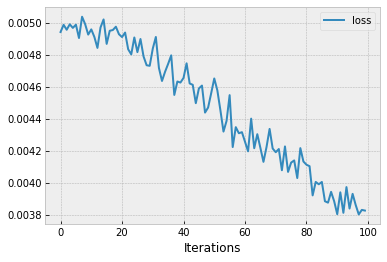

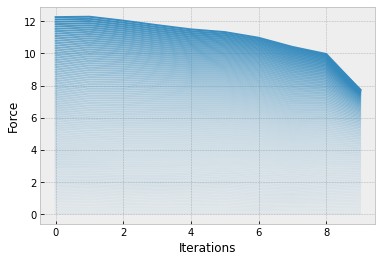

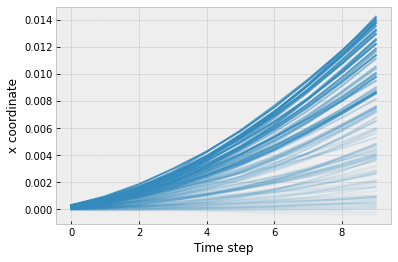

In [53]:
plt.figure()
plt.plot([i for i in range(N_iter)], loss_values, label="loss")
plt.xlabel("Iterations")
plt.ylabel("")
plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    plt.plot([i for i in range(T)], forces_values[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Iterations")
plt.ylabel("Force")
#plt.legend()
plt.show()

plt.figure()
for j in range(N_iter):
    #plt.plot([i for i in range(N_iter)], forces_values[j], label= "u", alpha = .9**(N_iter-j))
    plt.plot([i for i in range(T)], positions[j], alpha = .97**(N_iter-j), color = '#348ABD')
plt.xlabel("Time step")
plt.ylabel("x coordinate")
#plt.legend()
plt.show()

## DDP with smooth physics

### DDP with non smooth dynamics

In [24]:
from diffsim.simulator import Simulator, SimulatorNode
from diffsim.shapes import Ellipsoid, Plane
from diffsim.costs import residualTranslation
import crocoddyl as croc
from pinocchio.visualize import MeshcatVisualizer
import time

In [25]:
class ActionModel(croc.ActionModelAbstract):
    def __init__(self, state, simulator, jointCube, ptarget1 , cw1, cw2, dqrobot0Ref, terminal=False):
        self.sim = simulator
        self.ptarget1 = ptarget1
        self.terminal = terminal
        self.dqrobot0Ref = dqrobot0Ref
        self.t_dqrobot0Ref = torch.from_numpy(dqrobot0Ref)
        self.jointCube = jointCube
        self.costWeight1 = cw1
        self.costWeight2 = cw2
        self.costWeightAction = 1e-1
        self.costReg = 5e-7
        self.nv = self.sim.rmodel.nv 
        nu = 1
        nr = 1
        self.unone = np.zeros(self.nv)
        croc.ActionModelAbstract.__init__(self, state, nu, nr)

    def createData(self):
        data = croc.ActionModelAbstract.createData(self)
        data.node = SimulatorNode(self.sim)
        return data
    
    def calc(self, data, x, u=None):
        if u is None:
            u = self.unone
        t_x = torch.from_numpy(x)
        t_tau = torch.zeros(self.nv)
        t_tau[2] = u[0]
        t_xnext = data.node.makeStep(t_x, t_tau, calcPinDiff=False)
        if self.terminal:
            t_res1 = residualTranslation(t_xnext[:self.nv],
                                         data.node.rmodel,
                                         data.node.rdata,
                                         self.ptarget1,
                                         self.jointCube)
        else:
            #t_res1 = torch.zeros_like(data.node.rdata.t_resDists[0])
            t_res1 = torch.zeros_like(data.node.rdata.res_witness_vectors_.detach().clone())
        data.xnext[:] = t_xnext.detach().numpy()
        data.r[0] = self.costWeight1 * (t_xnext.detach().numpy()[2] - self.ptarget1[2])
        #data.r[6:self.nr-self.ndqrobot] = self.costWeightAction * u
        #data.r[self.nr-self.ndqrobot:] = self.costReg * (t_xnext[:self.ndqrobot].detach().numpy() - self.dqrobot0Ref)
        data.cost =  0.5 * sum(data.r**2)
        return data.xnext, data.cost


    def calcDiff(self, data, x, u=None):
        if u is None:
            u = self.unone
        xnext, cost = self.calc(data, x, u)
        t_x = torch.from_numpy(x).requires_grad_(True)
        t_u = torch.from_numpy(u).requires_grad_(True)
        def calcTorch(t_x, t_u):
            t_tau = torch.zeros(self.nv)
            t_tau[2] = t_u[0]
            t_xnext = data.node.makeStep(t_x, t_tau, calcPinDiff=True)
            if self.terminal:
                t_res1 = self.costWeight1 * residualTranslation(t_xnext[:self.nv],
                                                                data.node.rmodel,
                                                                data.node.rdata,
                                                                self.ptarget1,
                                                                self.jointCube)
            else:
                t_res1 = self.costWeight1 *torch.zeros_like( data.node.rdata.res_witness_vectors_.detach().clone())
                #t_res1 = self.costWeight1 *torch.zeros_like( data.node.rdata.t_resDists[0].detach().clone())
            #print(t_res1.size(), data.node.rdata.res_witness_vectors_.size())
            #t_res1 = self.costWeight1 * (t_xnext.detach().numpy()[:3] - self.ptarget1[:3])
            t_res_reg =  torch.tensor([0.]) #self.costReg * (t_xnext[2] - self.t_dqrobot0Ref) 
            t_res_u = self.costWeightAction * t_u
            t_res = torch.cat([t_res1, t_res_u, t_res_reg])
            t_cost = 0.5 * torch.sum(t_res * t_res)
            return t_xnext, t_cost
        
        J = torch.autograd.functional.jacobian(calcTorch, (t_x, t_u))
        data.Fx[:] = J[0][0].numpy()
        data.Fu[:] = J[0][1][:,0].numpy()
        if np.linalg.norm(data.Fu[:])<1e-9:
            data.Fu[:] = 0
        data.Lx[:] = J[1][0].numpy()
        data.Lu[:] = J[1][1].numpy()
        return xnext, cost


In [26]:
rmodel, rgeomModel, data, rgeom_data, jointCube = createCubeModel()

In [27]:
coeff_friction = 0.15
coeff_rest = 0.0
dt = 5e-3
T=10
sim = Simulator(rmodel, rgeomModel, dt, coeff_friction, coeff_rest, dt_collision=dt, steps_contact_cascade=10)
state = croc.StateVector(2*rmodel.nv)

In [28]:
theta =  0# np.pi /6
c,s = np.cos(theta), np.sin(theta)
rty = np.array([[c,0.,s],
               [0.,1.,0.],
               [-s,0.,c]])
n = np.array([s,0.,c])
tx, ty =  np.array([c,0.,-s]), np.array([0.,1.,0.])
gpo = pin.SE3(rty,np.matrix([0.,0.,0.]).T)
q_init = pin.SE3ToXYZQUAT(gpo)
q_init[:3] += .1*n
v_init = np.zeros(rmodel.nv)
pin.forwardKinematics(rmodel, data, q_init)
pin.updateGeometryPlacements(rmodel, data, rgeomModel, rgeom_data)

q0 = q_init
dq0 = pin.difference(rmodel, rmodel.qref, q0)
dqrobot0Ref = dq0[:rmodel.nv-6].copy()
v0 = np.random.rand(rmodel.nv) 
v0[rmodel.nv-6:] = np.zeros(6)
x0 = np.zeros(2*rmodel.nv)
x0[:rmodel.nv] = dq0
x0[rmodel.nv:] = v0
qtarget1 = torch.tensor(q_init)
qtarget1[2] += .1
qtarget1 = qtarget1.detach().numpy()

In [20]:
name = "cube_on_floor"
#viz = MeshcatVisualizer(rmodel, rgeomModel, rgeomModel)
#viz.initViewer()
viz = init_viewer_ellipsoids(rmodel, rgeomModel, open=False)
viz.loadViewerModel(name)
viz.viewer.jupyter_cell()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


In [21]:
viz.display(q0)

In [22]:
robotModel = rmodel.copy()
robotData = robotModel.createData()
q = q0
T = 10
ug = pin.computeGeneralizedGravity(robotModel, robotData, q)
actionModel1 = ActionModel(state, sim, jointCube, qtarget1[:3], 10, 0., dqrobot0Ref, terminal=False)
actionModelTerminal = ActionModel(state, sim, jointCube, qtarget1[:3], 1000., 1000., dqrobot0Ref, terminal=True)
problem = croc.ShootingProblem(x0, [actionModel1]*T,
                               actionModelTerminal)

ddp = croc.SolverFDDP(problem)
log = croc.CallbackLogger()
ddp.setCallbacks([log, croc.CallbackVerbose()])

In [23]:
init_us = [ug[2:3]*0.] * T
init_xs = problem.rollout(init_us)
done = ddp.solve(init_xs, init_us, 10)
print(done)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0.

In [68]:
for t in trange(T):
    dq = init_xs[t][:rmodel.nv]
    viz.display(pin.integrate(rmodel,rmodel.qref,dq))
    time.sleep(.5)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.96it/s]


In [107]:
print(init_xs.tolist())

[array([0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]), array([ 1.32013621e-18, -2.45053867e-18,  9.99998911e-02,  1.36105507e-17,
        7.55833816e-18,  5.91645679e-33,  3.39610624e-16, -6.26213241e-16,
       -2.17893463e-05,  2.72211014e-15,  1.51166763e-15,  1.18329136e-30]), array([ 3.52627719e-18,  1.54889821e-18,  9.99997929e-02,  1.43468155e-17,
        3.21058823e-17,  9.52428986e-33,  6.86703444e-16,  7.92524602e-16,
       -1.96210604e-05,  1.47252960e-16,  4.90950883e-15,  6.88712548e-31]), array([ 3.06963169e-18, -4.40027893e-18,  9.99997047e-02,  1.83099738e-17,
        5.44179836e-17,  4.82452483e-32,  1.31791733e-16, -1.22946706e-15,
       -1.76588617e-05,  7.92631667e-16,  4.46242026e-15,  7.72490501e-30]), array([ 4.40816365e-18,  6.42964996e-18,  9.99996252e-02,  3.28751849e-18,
        6.64181727e-17,  2.73494407e-32,  3.87708362e-16,  2.31620974e-15,
       -1.58928881e-05, -3.00449107e-15,  2.40003781e-15, -4.28288301e-30]), array([-1.22065318e-18

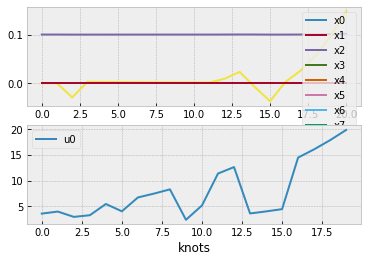

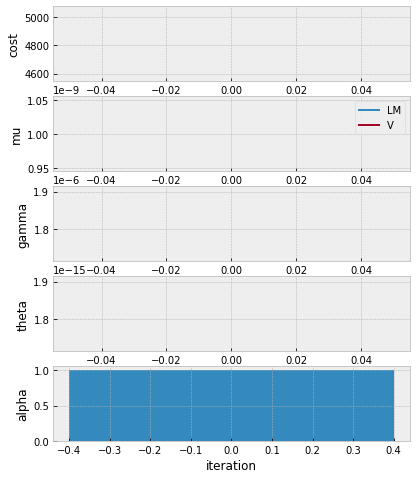

In [115]:
croc.plotOCSolution(log.xs, log.us, figIndex=1, show=False)
croc.plotConvergence(log.costs, log.u_regs, log.x_regs, log.grads, log.stops, log.steps, figIndex=2)

In [102]:
print("xs",list(ddp.xs),"us", list(ddp.us))

xs [array([0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]), array([-4.95742927e-20, -1.98878816e-19,  9.99998911e-02,  1.03123118e-18,
       -2.88792292e-19, -4.31408308e-34, -1.28027815e-17, -5.00880749e-17,
       -2.17893463e-05,  2.06246236e-16, -5.77584585e-17, -8.62816615e-32]), array([-3.14245319e-18, -3.70338304e-18,  9.99997929e-02,  2.21025638e-17,
       -1.77908410e-17,  1.10178006e-32, -7.93596079e-16, -9.11613953e-16,
       -1.96215528e-05,  4.21426653e-15, -3.50040974e-15,  2.29103811e-30]), array([-2.63421157e-18,  7.05824367e-18,  9.99997047e-02, -3.97311743e-18,
       -4.36379631e-17,  4.01631348e-32, -1.56822518e-16,  2.41308142e-15,
       -1.76588132e-05, -5.21513625e-15, -5.16942442e-15,  5.93258645e-30]), array([-4.22404403e-18,  1.23270207e-18,  9.99996252e-02, -5.94574540e-17,
       -5.82422560e-17,  3.92817397e-32, -4.64009337e-16, -6.10266563e-16,
       -1.58928446e-05, -1.10968673e-14, -2.92085857e-15,  6.00408660e-32]), array([-2.38357487e

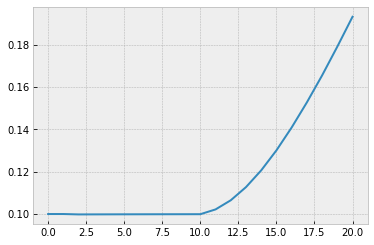

In [79]:
xs = np.stack(ddp.xs)
plt.figure()
plt.plot([i for i in range(len(xs))],[pin.integrate(rmodel,rmodel.qref,dq)[2] for dq in xs[:,:rmodel.nv]])
plt.show()

In [106]:
xs = np.stack(ddp.xs)

time.sleep(3.)

for t in trange(T):
    dq = xs[t,:rmodel.nv]
    viz.display(pin.integrate(rmodel,rmodel.qref,dq))
    time.sleep(dt)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 66.95it/s]


### DDP with smooth dynamics 

In [46]:
class SmoothActionModel(croc.ActionModelAbstract):
    def __init__(self, state, simulator, jointCube, ptarget1 , cw1, cw2, dqrobot0Ref, noiseIntensity, nbSamples, terminal=False):
        self.sim = simulator
        self.ptarget1 = ptarget1
        self.terminal = terminal
        self.dqrobot0Ref = dqrobot0Ref
        self.t_dqrobot0Ref = torch.from_numpy(dqrobot0Ref)
        self.jointCube = jointCube
        self.costWeight1 = cw1
        self.costWeight2 = cw2
        self.costWeightAction = 1e-1
        self.costReg = 5e-7
        self.nv = self.sim.rmodel.nv 
        self.noiseIntensity = noiseIntensity
        self.nbSamples = nbSamples
        nu = 1
        nr = 1
        self.unone = np.zeros(self.nv)
        croc.ActionModelAbstract.__init__(self, state, nu, nr)

    def createData(self):
        data = croc.ActionModelAbstract.createData(self)
        data.node = SimulatorNode(self.sim)
        return data
    
    def calc(self, data, x, u=None, uNoise = None):
        if u is None:
            u = self.unone
        if uNoise is None:
            uNoise = torch.zeros((self.nbSamples, u.shape[0]))
        t_x = torch.from_numpy(x)
        t_xnext = torch.zeros_like(t_x)
        for ui in uNoise:
            t_tau = torch.zeros(self.nv)
            t_tau[2] = u[0]+ ui
            t_xnexti = data.node.makeStep(t_x, t_tau, calcPinDiff=False)
            t_xnext += t_xnexti
        t_xnext /= self.nbSamples
        if self.terminal:
            #t_res1 = self.costWeight1 * residualTranslation(t_xnext[:self.nv],
            #                                                data.node.rmodel,
            #                                                data.node.rdata,
            #                                                self.ptarget1,
            #                                                self.jointCube)
            x_tar = torch.zeros_like(t_xnext)
            x_tar[2] = self.ptarget1[2]
            t_res1 = self.costWeight1*(t_xnext - x_tar)
        else:
            t_res1 = torch.zeros_like(data.node.rdata.res_witness_vectors_.detach().clone())
            #t_res1 = torch.zeros_like(data.node.rdata.t_resDists[0])
        data.xnext[:] = t_xnext.detach().numpy()
        data.r[0] = self.costWeight1 * (t_xnext.detach().numpy()[2] - self.ptarget1[2])
        #data.r[6:self.nr-self.ndqrobot] = self.costWeightAction * u
        #data.r[self.nr-self.ndqrobot:] = self.costReg * (t_xnext[:self.ndqrobot].detach().numpy() - self.dqrobot0Ref)
        data.cost =  0.5 * sum(data.r**2)
        return data.xnext, data.cost


    def calcDiff(self, data, x, u=None):
        if u is None:
            u = self.unone
        xnext, cost = self.calc(data, x, u)
        t_x = torch.from_numpy(x).requires_grad_(True)
        t_u = torch.from_numpy(u).requires_grad_(True)
        def calcTorch(t_x, t_u):
            t_xnext = torch.zeros_like(t_x)
            uNoise = self.noiseIntensity*torch.randn((self.nbSamples, t_u.size()[0]))
            for i in range(self.nbSamples): 
                t_tau = torch.zeros(self.nv) 
                t_tau[2] = t_u[0] + uNoise[i]
                t_xnexti = data.node.makeStep(t_x, t_tau, calcPinDiff=True)
                t_xnext += t_xnexti
            t_xnext /= self.nbSamples 
            if self.terminal:
                #t_res1 = self.costWeight1 * residualTranslation(t_xnext[:self.nv],
                #                                                data.node.rmodel,
                #                                                data.node.rdata,
                #                                                self.ptarget1,
                #                                                self.jointCube)
                x_tar = torch.zeros_like(t_xnext)
                x_tar[2] = self.ptarget1[2]
                t_res1 = self.costWeight1*(t_xnext - x_tar)
            else:
                #t_res1 = self.costWeight1 *torch.zeros_like( data.node.rdata.t_resDists[0].detach().clone())
                t_res1 = self.costWeight1 *torch.zeros_like( data.node.rdata.res_witness_vectors_.detach().clone())
            #t_res1 = self.costWeight1 * (t_xnext.detach().numpy()[:3] - self.ptarget1[:3])
            t_res_reg =  torch.tensor([0.]) #self.costReg * (t_xnext[2] - self.t_dqrobot0Ref) 
            t_res_u = self.costWeightAction * t_u
            t_res = torch.cat([t_res1, t_res_u, t_res_reg])
            t_cost = 0.5 * torch.sum(t_res * t_res)
            return t_xnext, t_cost
        
        J = torch.autograd.functional.jacobian(calcTorch, (t_x, t_u))
        data.Fx[:] = J[0][0].numpy()
        data.Fu[:] = J[0][1][:,0].numpy()
        if np.linalg.norm(data.Fu[:])<1e-9:
            data.Fu[:] = 0
        print(data.Fu)
        data.Lx[:] = J[1][0].numpy()
        data.Lu[:] = J[1][1].numpy()
        #print("Fx",data.Fx, "Fu", data.Fu, "Lx",data.Lx, "Lu", data.Lu)
        return xnext, cost

In [47]:
robotModel = rmodel.copy()
robotData = robotModel.createData()
q = q0
T = 10
ug = pin.computeGeneralizedGravity(robotModel, robotData, q)
actionModel1 = SmoothActionModel(state, sim, jointCube, qtarget1[:3], 10, 0., dqrobot0Ref, 10e-0, 8, terminal=False)
actionModelTerminal = SmoothActionModel(state, sim, jointCube, qtarget1[:3], 1000., 1000., dqrobot0Ref,10e-0, 8, terminal=True)
problem = croc.ShootingProblem(x0, [actionModel1]*T,
                               actionModelTerminal)

ddp = croc.SolverFDDP(problem)
log = croc.CallbackLogger()
ddp.setCallbacks([log, croc.CallbackVerbose()])

In [48]:
init_us = [ug[2:3]*0.] * T
init_xs = problem.rollout(init_us)
done = ddp.solve(init_xs, init_us, 10)
print(done)

[-5.60218538e-15 -3.15081294e-15  3.12500039e-06  1.68611791e-13
 -9.30100441e-14  2.77747397e-21 -1.25737618e-12  1.46428647e-12
  6.25000030e-04  3.34239264e-11 -2.47018800e-11  4.40660420e-19]
[-7.95363775e-15 -6.04405408e-15  3.12500039e-06  8.60467253e-14
 -7.60991270e-14  2.74226927e-22 -1.39266352e-12 -1.19371149e-13
  6.25000030e-04  2.25372826e-11 -3.62251779e-11 -1.01508428e-19]
[-7.07434110e-15 -5.90860700e-15  3.12500039e-06  9.00257646e-14
 -1.77564630e-13  5.00278841e-22 -2.26009433e-12 -5.80939719e-12
  6.25000030e-04  3.81987775e-11 -1.49611917e-11  2.84603387e-21]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-3.51274565e-15 -2.76445533e-15  1.25000002e-05  8.29913915e-14
 -6.50857146e-14 -8.73502702e-23 -1.36878963e-12 -3.09228198e-12
  2.50000002e-03  1.61526215e-11 -1.42608791e-11  5.52943122e-20]
[-6.58806332e-15 -4.13891131e-15  3.12500039e-06  1.01962883e-13
 -1.06936682e-13  1.11172980e-23 -5.41149299e-13 -2.49883688e-12
  6.250000

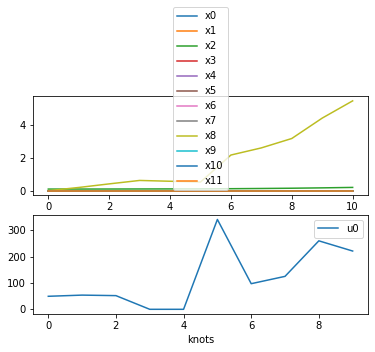

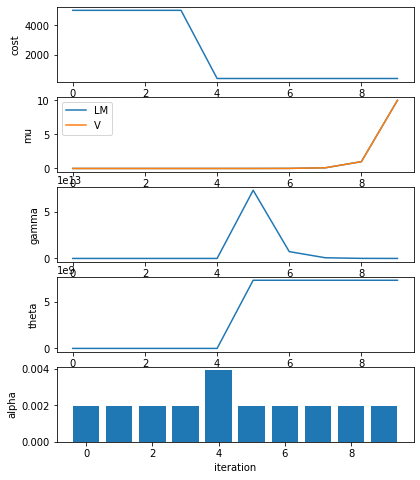

In [49]:
croc.plotOCSolution(log.xs, log.us, figIndex=1, show=False)
croc.plotConvergence(log.costs, log.u_regs, log.x_regs, log.grads, log.stops, log.steps, figIndex=2)

In [ ]:
xs = ddp.xs
for t in trange(T):
    dq = xs[t][:rmodel.nv]
    viz.display(pin.integrate(rmodel,rmodel.qref,dq))
    time.sleep(.5)

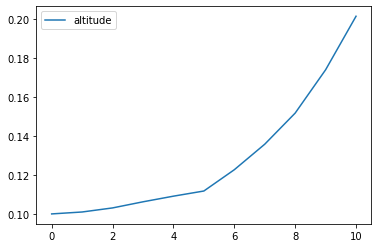

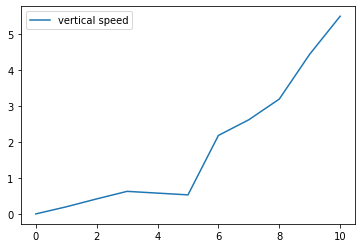

In [50]:
xs = np.stack(ddp.xs)
plt.figure()
plt.plot([i for i in range(len(xs))],[pin.integrate(rmodel,rmodel.qref,dq)[2] for dq in xs[:,:rmodel.nv]], label = "altitude")
plt.legend()
plt.show()

plt.figure()
plt.plot([i for i in range(len(xs))],[v[2] for v in xs[:,-rmodel.nv:]], label = "vertical speed")
plt.legend()
plt.show()
